In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import re
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raghav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
df=pd.read_csv(r'C:\Users\Raghav\OneDrive\Desktop\Sentiment_Analysis_on_Social_Media\data\tweets.csv',encoding='latin-1')

In [26]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [27]:
df.shape

(1600000, 6)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [29]:
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [47]:
df['target'].value_counts()

target
Negative    800000
Positive    800000
Name: count, dtype: int64

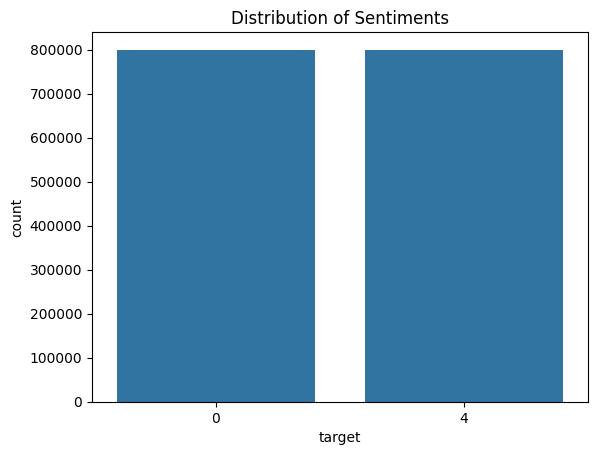

In [30]:
sns.countplot(x='target',data=df)
plt.title('Distribution of Sentiments')
plt.show()

In [31]:
df['target']=df['target'].map({0:"Negative",4:"Positive"})

In [46]:
df[df['target']=='Positive'].head()

,target,id,date,flag,user,text,cleaned_text
800000,Positive,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!,love u guys r best
800001,Positive,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...,im meeting one besties tonight cant wait girl ...
800002,Positive,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",thanks twitter add sunisa got meet hin show dc...
800003,Positive,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...,sick really cheap hurts much eat real food plu...
800004,Positive,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,effect everyone


In [32]:
df.head()

,target,id,date,flag,user,text
0,Negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [33]:
def clean_text(text):
    text=str(text).lower()
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)       # Remove mentions
    text = re.sub(r'#', '', text)                     # Remove hashtag symbol
    text = re.sub(r'RT[\s]+', '', text)               # Remove RT
    text = re.sub(r'https?:\/\/\S+', '', text)        # Remove hyperlinks
    text = re.sub(f"[{string.punctuation}]", "", text) # Remove punctuation
    text = re.sub(r'\d+', '', text)                   # Remove numbers
    text = text.strip()
    return text

df['cleaned_text'] = df['text'].apply(clean_text)
df[['text', 'cleaned_text']].head()

,text,cleaned_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david car...
1,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...


In [34]:
#Removing stopwords
stop_words=set(stopwords.words('english'))

def remove_stopwords(text):
    words=text.split()
    filtered_words=[word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['cleaned_text']=df['cleaned_text'].apply(remove_stopwords)

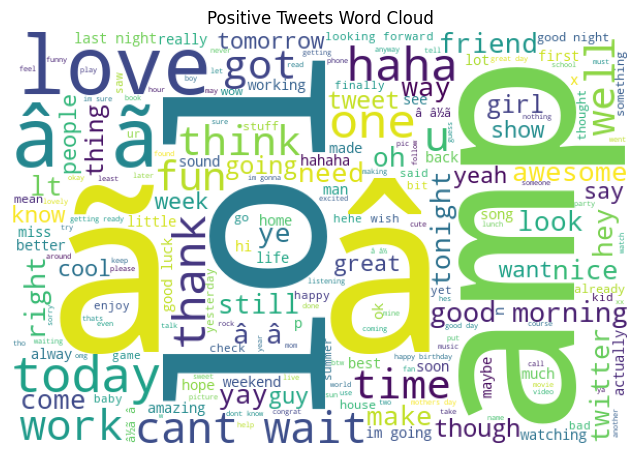

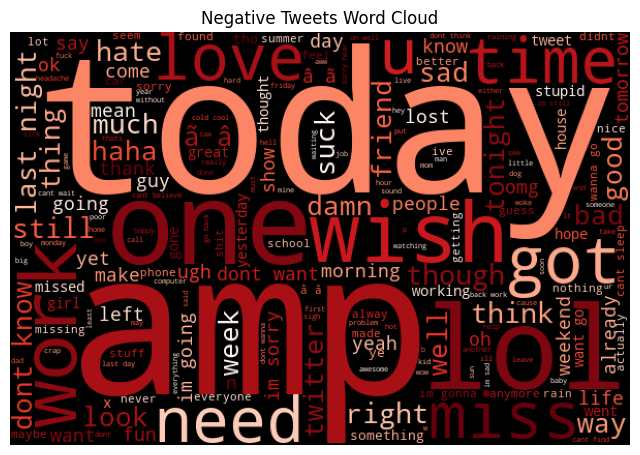

In [35]:
positive_words=' '.join(df[df['target']=='Positive']['cleaned_text'])
negative_words=' '.join(df[df['target']=='Negative']['cleaned_text'])

wc_pos=WordCloud(width=600,height=400,background_color='white').generate(positive_words)
plt.figure(figsize=(8,6))
plt.imshow(wc_pos)
plt.axis('off')
plt.title('Positive Tweets Word Cloud')
plt.show()

wc_neg=WordCloud(width=600,height=400,background_color='black',colormap='Reds').generate(negative_words)
plt.figure(figsize=(8,6))
plt.imshow(wc_neg)
plt.axis('off')
plt.title('Negative Tweets Word Cloud')
plt.show()

In [36]:
import joblib 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [37]:
X=df['cleaned_text']
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [38]:
tfidf=TfidfVectorizer(max_features=5000)
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

In [39]:
model=LogisticRegression(max_iter=200)
model.fit(X_train_tfidf,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [40]:
y_pred=model.predict(X_test_tfidf)

In [41]:
print("Accuracy:\n",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy:
 0.774071875
Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.75      0.77    160000
    Positive       0.76      0.80      0.78    160000

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



In [45]:
joblib.dump(model,"../backend/models/sentiment_model.pkl")
joblib.dump(tfidf,"../backend/models/tfidf_vectorizer.pkl")

['../backend/models/tfidf_vectorizer.pkl']

In [48]:
model=joblib.load("../backend/models/sentiment_model.pkl")
print(model.classes_)

['Negative' 'Positive']
